# Lab 3: Linear Regression
In this assignment, we will learn the Linear Regression model.

## 1. Example: Linear Regression for House Price Prediction
In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/cisdatasciencetu/CIS3715_DataScience_2023/main/Lab03/housing.csv')
# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print("\n")
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 M

### 1.2 Split the preprocessed dataset into training set and testing set

In [2]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model

In [3]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873203
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model


prediction for testing set:
MAE is: 0.10369354831097966
MSE is: 0.02022001958450323
RMSE is: 0.14219711524677014


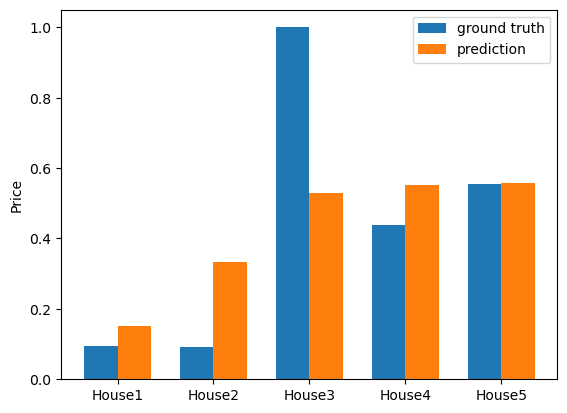

In [4]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## 2. Task: Linear Regression for Medical Cost Prediction
Following the given example, build a linear regression model for the insurance dataset to predict the medical cost.



### 2.1 Preprocess the raw data

In [5]:
insur = pd.read_csv('https://raw.githubusercontent.com/cisdatasciencetu/CIS3715_DataScience_2023/main/Lab03/insurance.csv')

print(insur.head())

print("\nfeature     missing values")
print("-------     --------------")
print(insur.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

feature     missing values
-------     --------------
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
# convert categorical features to numerical values
labelencoder = LabelEncoder()
insur['sex'] = labelencoder.fit_transform(insur['sex'])
insur['smoker'] = labelencoder.fit_transform(insur['smoker'])
insur['region'] = labelencoder.fit_transform(insur['region'])

print(insur.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


### 2.2 Split the preprocessed dataset into training set and testing set

In [7]:
feature = insur.drop('charges', axis=1).values
print(feature)
print("\n")

charges = insur['charges'].values
charges = charges / np.max(charges)
print(charges)

X_train,X_test,y_train,y_test = train_test_split(feature,
                                                 charges,
                                                 test_size=0.2,
                                                 random_state=42)


[[19.    0.   27.9   0.    1.    3.  ]
 [18.    1.   33.77  1.    0.    2.  ]
 [28.    1.   33.    3.    0.    2.  ]
 ...
 [18.    0.   36.85  0.    0.    2.  ]
 [21.    0.   25.8   0.    0.    3.  ]
 [61.    0.   29.07  0.    1.    1.  ]]


[0.26477671 0.02705882 0.06977312 ... 0.02555783 0.03148709 0.45697295]


In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [9]:
# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### 2.3 Train the linear regression model

In [10]:
lnr = LinearRegression()

lnr.fit(X_train,y_train)

print("Bias: {}".format(lnr.intercept_))
print("Coefficients: {}".format(lnr.coef_))

y_train_pred = lnr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('\nPrediction for Training Set')
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

Bias: 0.20928336460705027
Coefficients: [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]

Prediction for Training Set
MAE: 0.0659986479709151
MSE: 0.00916737434945697
RMSE: 0.09574640645714579


### 2.4 Evaluate the linear regression model


Prediction for Testing Set
MAE: 0.06564969107169769
MSE: 0.008270951713078178
RMSE: 0.09094477287386109


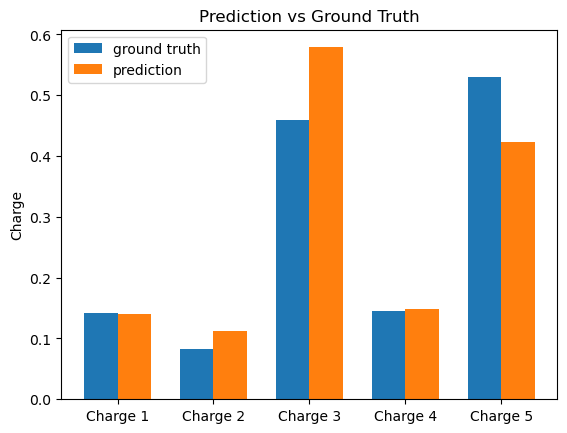

In [11]:
y_test_pred = lnr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('Prediction for Testing Set')
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))


labels = ['Charge 1', 'Charge 2', 'Charge 3', 'Charge 4', 'Charge 5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Charge')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title("Prediction vs Ground Truth")
ax.legend()

plt.show()

### 2.5 Use the ridge regression model to do prediction


In [12]:
rr = Ridge(alpha = 1)
print('Ridge Regression with lambda value of 1')

rr.fit(X_train,y_train)

print("Bias: {}".format(rr.intercept_))
print("Coefficients: ".format(rr.coef_))

y_test_pred = rr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('Prediction for Testing Set')
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

rr = Ridge(alpha = .5)
print('\nRidge Regression with lambda value of .5')

rr.fit(X_train,y_train)

print("Bias: {}".format(rr.intercept_))
print("Coefficients: {}".format(rr.coef_))

y_test_pred = rr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('Prediction for Testing Set')
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))

rr = Ridge(alpha = 2)
print('\nRidge Regression with lambda value of 2')

rr.fit(X_train,y_train)

print("Bias: {}".format(rr.intercept_))
print("Coefficients: {}".format(rr.coef_))

y_test_pred = rr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('Prediction for Testing Set')
print('MAE: {}'.format(mae))
print('MSE: {}'.format(mse))
print('RMSE: {}'.format(rmse))


Ridge Regression with lambda value of 1
Bias: 0.20928336460705027
Coefficients: 
Prediction for Testing Set
MAE: 0.06567262940074668
MSE: 0.008272576669548308
RMSE: 0.09095370618918346

Ridge Regression with lambda value of .5
Bias: 0.20928336460705027
Coefficients: [ 5.66763901e-02 -1.42097922e-04  3.17939348e-02  8.10077598e-03
  1.49796105e-01 -4.73766172e-03]
Prediction for Testing Set
MAE: 0.06566116640105915
MSE: 0.008271758135158376
RMSE: 0.09094920634705053

Ridge Regression with lambda value of 2
Bias: 0.20928336460705027
Coefficients: [ 5.65904294e-02 -1.26570140e-04  3.17565563e-02  8.09735070e-03
  1.49580983e-01 -4.72521546e-03]
Prediction for Testing Set
MAE: 0.06569551848974613
MSE: 0.008274249930384794
RMSE: 0.0909629041444082
